In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris.data
label = iris.target
columns = iris.feature_names

In [5]:
data = pd.DataFrame(data, columns=columns)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.shape

(150, 4)

In [7]:
# 데이터를 쪼개는 작업
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

In [8]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [9]:
# Training 
lr.fit(X_train, y_train)

C:\Users\ljh29\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
y_pred

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

In [12]:
y_test

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

In [13]:
# 결과 확인 
from sklearn.metrics import accuracy_score

In [14]:
print('로지스틱 회귀 정확도: {:.2f}'.format(accuracy_score(y_test, y_pred) * 100))
print('로지스틱 회귀, \n계수(w): {0}\n절편(b): {1}'.format(
                              lr.coef_, lr.intercept_))

로지스틱 회귀 정확도: 100.00
로지스틱 회귀, 
계수(w): [[-0.4453824   0.89542595 -2.33680587 -1.03348345]
 [ 0.49430653 -0.33670595 -0.1930103  -0.85033915]
 [-0.04892412 -0.55872     2.52981617  1.8838226 ]]
절편(b): [  9.45604436   2.1554048  -11.61144916]


In [15]:
# SVC
from sklearn.svm import SVC

In [16]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  svc = SVC(C=i)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  print('서포트 벡터 머신, i={} 정확도: {:.2f}'.format(i,accuracy_score(y_test, y_pred)*100))

서포트 벡터 머신, i=0.1 정확도: 90.00
서포트 벡터 머신, i=0.2 정확도: 100.00
서포트 벡터 머신, i=0.3 정확도: 100.00
서포트 벡터 머신, i=0.4 정확도: 100.00
서포트 벡터 머신, i=0.5 정확도: 100.00
서포트 벡터 머신, i=0.6 정확도: 100.00
서포트 벡터 머신, i=0.7 정확도: 100.00
서포트 벡터 머신, i=0.8 정확도: 100.00
서포트 벡터 머신, i=0.9 정확도: 100.00
서포트 벡터 머신, i=1 정확도: 100.00


In [17]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

In [18]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Tree 정확도: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Tree 정확도: 100.00%


In [19]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='tree.dot')

In [22]:
from subprocess import call
call(['C:\\Program Files\\Graphviz\\bin\\dot','dot','-Tpng','tree.dot','-o','decision-tree.png','-Gdpi=600'])

1

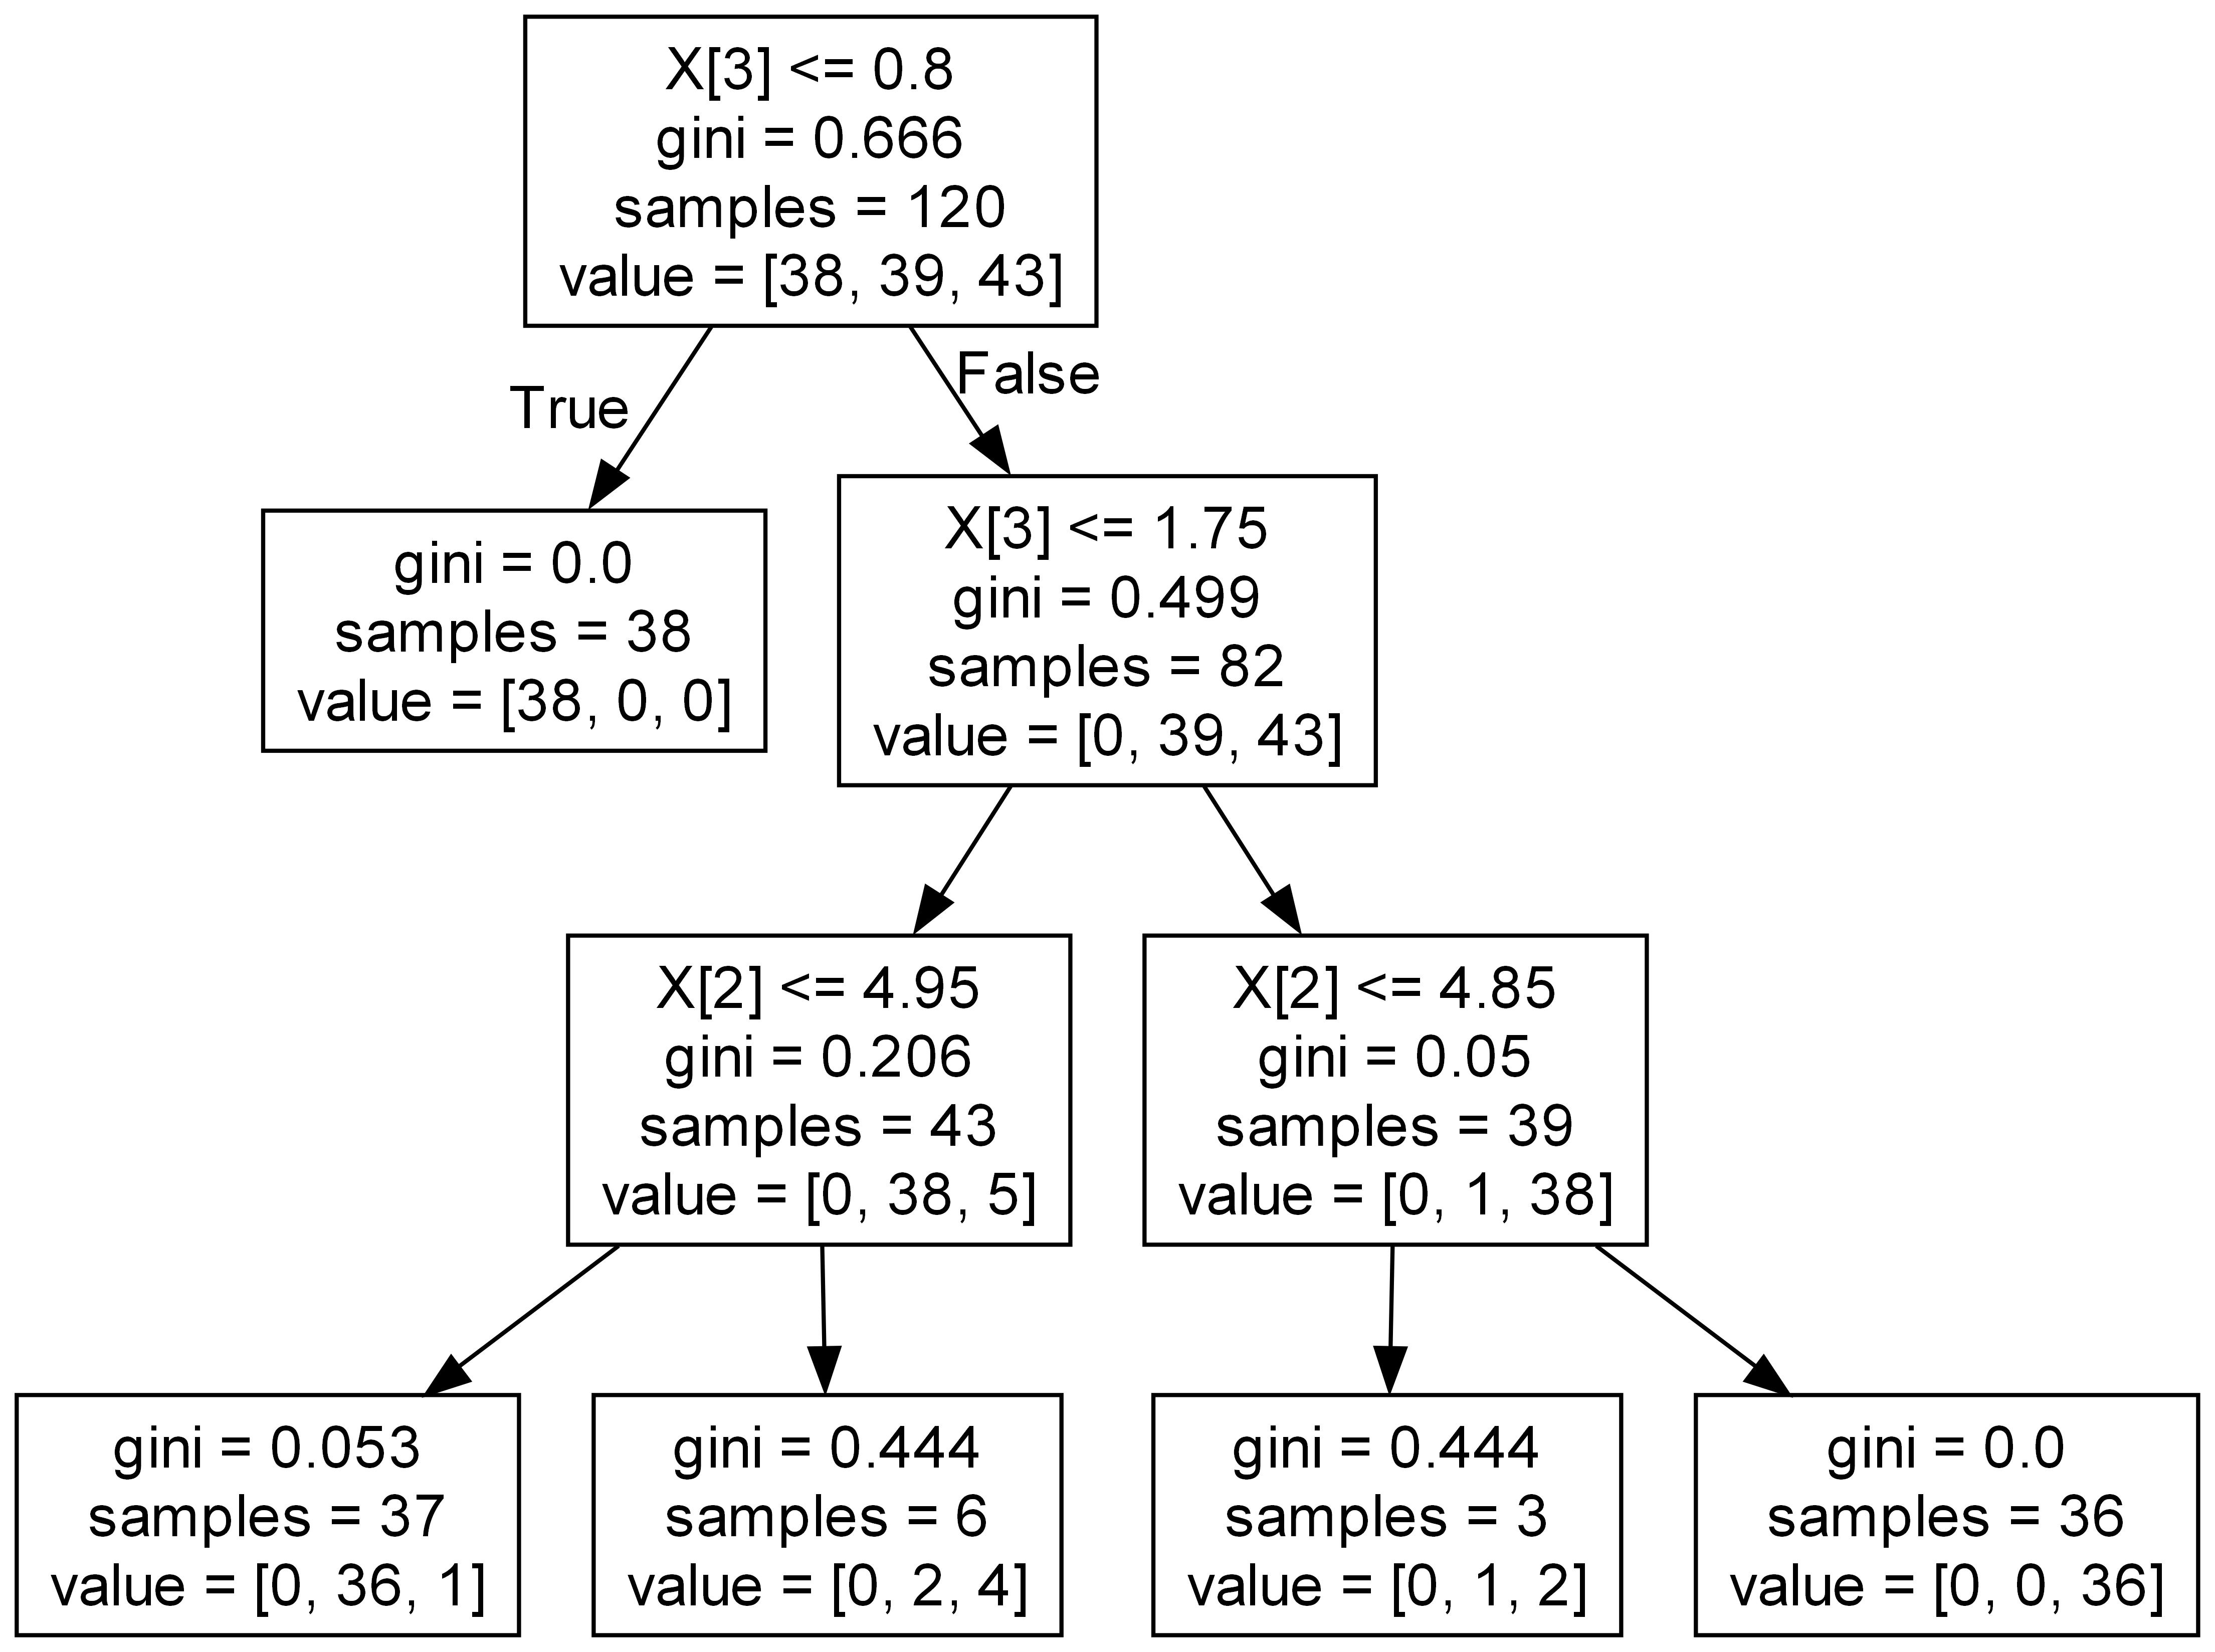

In [23]:
from IPython.display import Image
Image(filename = 'decision-tree.png')

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('랜덤 포레스트 정확도: {:.2f}'.format(accuracy_score(y_test, y_pred) * 100))

랜덤 포레스트 정확도: 100.00


In [26]:
import os
from os.path import join

abalone_path = join('.','abalone.txt')
column_path = join('.','abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
  abalone_columns.append(l.strip())

In [27]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)

data = data[data['Sex'] !='I']
label = data['Sex'].map(lambda x: 0 if x=='M' else 1)
del data['Sex']
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
                    data, label, test_size=0.2, random_state=2023)

In [29]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy: 0.52
precision: 0.51
recall: 0.26
AUC: 0.51


In [31]:
best_model_depth = 0
best_model_accuracy = 0

for i in [2,3,4,5,6,7,8,9,10]:
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print('Accuracy: i={} {:.2f}'.format(i, acc * 100))

  if best_model_accuracy < acc:
    best_model_depth = i
    best_model_accuracy = acc

print('-------------------------------')
print('best_model_depth={0}, best_model_accracy={1}'.format(
    best_model_depth, best_model_accuracy))

Accuracy: i=2 52.91
Accuracy: i=3 51.50
Accuracy: i=4 51.50
Accuracy: i=5 53.97
Accuracy: i=6 52.91
Accuracy: i=7 55.20
Accuracy: i=8 53.09
Accuracy: i=9 53.09
Accuracy: i=10 52.73
-------------------------------
best_model_depth=7, best_model_accracy=0.5520282186948854
